    Installing Necessaary libraries

In [11]:
!pip install scikit-learn==1.2.2

  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/db/98/169b46a84b48f92df2b5e163fce75d471f4df933f8b3d925a61133210776/scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.3 MB 1.1 MB/s eta 0:00:08
    --------------------------------------- 0.2/8.3 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.3/8.3 MB 2.0 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/8.3 MB 2.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/8.3 MB 2.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/8.3 MB 3.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.2/8.3 MB 3.4 MB/s eta 0:00:03
   ------ --------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
farm-haystack 1.25.0 requires scikit-learn>=1.3.0, but you have scikit-learn 1.2.2 which is incompatible.


Importing Necessary libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
import time

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.optim import AdamW
from torch.nn.functional import cross_entropy

In [27]:
import torch.nn.functional as F

In [4]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

The Dataset contain product_name, Rate , Review, Summary which is descriptive informationn of customer's thought on each product and Sentiment based on Summary. We will use Summary and Sentiment column for this analysis.

In [5]:
df=pd.read_csv("Flipkart_Product_Review.csv")
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [6]:
df.shape[0]

205052

In [7]:
df.dtypes

product_name     object
product_price    object
Rate             object
Review           object
Summary          object
Sentiment        object
dtype: object

In [8]:
df.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [9]:
# Convert 'Rate' column to numeric, coercing errors to NaN
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')

In [10]:
df.dtypes

product_name      object
product_price     object
Rate             float64
Review            object
Summary           object
Sentiment         object
dtype: object

In [11]:
df.isnull().sum()

product_name         0
product_price        0
Rate                 3
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [12]:
df_rate = df.dropna(subset=['Rate'])

In [13]:
df_rate[(df_rate['Rate']>3) & (df_rate['Sentiment']=='negative')]

,product_name,product_price,Rate,Review,Summary,Sentiment
123,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5.0,perfect product!,not working motors and very bad poor maharaja ...,negative
359,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,4.0,value-for-money,first thing cooler is very silent at the lowes...,negative
395,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5.0,classy product,good but there is have no stand thats much des...,negative
469,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5.0,brilliant,good productbuying worst,negative
544,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,5.0,terrific,nice products but one problem brod size,negative
...,...,...,...,...,...,...
204891,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,4.0,worth the money,size of each type of item is a bit smaller tha...,negative
204903,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5.0,perfect product!,goodbut little bit small in size,negative
204933,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5.0,must buy!,all products are goodbutwhy do you restrict th...,negative
204977,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,4.0,good quality product,size is small,negative


In [14]:
df_rate[(df_rate['Rate']<3) & (df_rate['Sentiment']=='positive')]

,product_name,product_price,Rate,Review,Summary,Sentiment
59,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,1.0,worthless,the product doesnt cool as rated by other cust...,positive
73,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,1.0,useless product,dont buy maharaja whiteline coolers they have ...,positive
86,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,2.0,expected a better product,this is my review after using this product for...,positive
126,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,2.0,bad quality,fan speed is slow and making lot of noise,positive
147,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,1.0,absolute rubbish!,speed of cooler is slower than fan after one w...,positive
...,...,...,...,...,...,...
203498,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,2.0,classy product,amazing product,positive
203661,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,1.0,waste of money!,products is very good but products is very ver...,positive
204192,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,1.0,worst experience ever!,bast,positive
204646,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,1.0,useless product,plate size r ok but bowles r too small for cur...,positive


In [15]:
df_cleaned=df_rate[((df_rate['Rate']>=3) & (df_rate['Sentiment']=='positive')) | ((df_rate['Rate']<=3) & (df_rate['Sentiment']=='negative')) | (df_rate['Sentiment']=='neutral')]

We have some discrepancies the data in such a way that a higher rating product's sentiment is recorded as negative and a lower rating product's sentiment is recorded as positive. So we have removed those discrepancies.

In [16]:
df_cleaned.shape[0]

201333

In [17]:
df_cleaned['Sentiment'].value_counts()

Sentiment
positive    164571
negative     26523
neutral      10239
Name: count, dtype: int64

In [18]:
df_cleaned['product_name'].nunique()

958

In [19]:
df_cleaned.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24299
Summary             11
Sentiment            0
dtype: int64

We will be using Summary to get the prediction of the sentiment. So we are removing the null values.

In [20]:
df_cleaned = df_cleaned.dropna(subset=['Summary'])

In [21]:
df_cleaned.shape[0]

201322

In [22]:
df_summary=df_cleaned[['product_name', 'Summary','Sentiment']]
df_summary.head()

,product_name,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,ok ok product,neutral


In [23]:
df_summary.isnull().sum()

product_name    0
Summary         0
Sentiment       0
dtype: int64

In [24]:
df_summary['Sentiment'].value_counts()

Sentiment
positive    164565
negative     26523
neutral      10234
Name: count, dtype: int64

In [28]:
counts = df_summary['Sentiment'].value_counts()

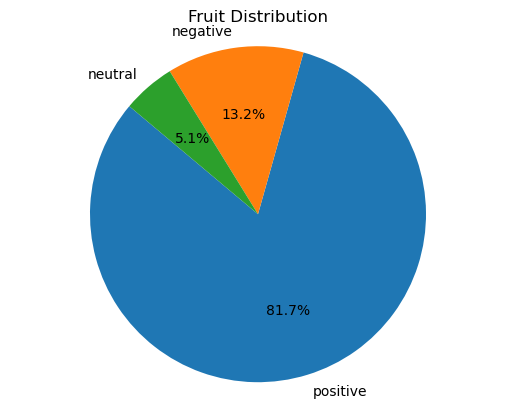

In [29]:
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Fruit Distribution")
plt.show()

This is a very imbalanced dataset which can cause bias towards one class. So I am going to upsample the Negative and Neutral classes.

Splitting the data in train and test dataset.

In [30]:
X = df_summary['Summary']

y = df_summary['Sentiment']

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Combine the training features and labels into a single DataFrame
train_dataset = pd.DataFrame({'Summary': X_train, 'Sentiment': y_train})

train_dataset.head()

,Summary,Sentiment
10135,quality is nice but go for one larger size,positive
79285,this is the best,positive
86779,very nice product,positive
86846,nice,positive
3819,awesome,positive


In [32]:
train_dataset["Sentiment"].value_counts()

Sentiment
positive    131647
negative     21258
neutral       8152
Name: count, dtype: int64

In [33]:
# Separate majority and minority classes
df_positive = train_dataset[train_dataset['Sentiment'] == 'positive']
df_negative = train_dataset[train_dataset['Sentiment'] == 'negative']
df_neutral = train_dataset[train_dataset['Sentiment'] == 'neutral']

df_positive=df_positive.sample(n=50000)

# Upsample minority class
df_negative_upsampled = resample(df_negative, 
                                 replace=True,     # sample with replacement
                                 n_samples=50000,    # to match majority class
                                 random_state=42)  # reproducible results

# Upsample minority class
df_neutral_upsampled = resample(df_neutral, 
                                 replace=True,     # sample with replacement
                                 n_samples=50000,    # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_positive, df_negative_upsampled, df_neutral_upsampled])

print(df_upsampled['Sentiment'].value_counts())

Sentiment
positive    50000
negative    50000
neutral     50000
Name: count, dtype: int64


From Summary we are making TFIDF word vectors.

In [34]:
# Step 1: Vectorize text data (TF-IDF vectorization)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(df_upsampled['Summary'])
y_train = df_upsampled['Sentiment']

Used the TFIDF word vectors of Summary and Sentiment to train a random forest model. It took almost 20 minutes to train.

In [34]:
start_time=time.time()

# Step 4: Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

end_time=time.time()

execution_time=end_time-start_time

print("Time taken in minutes:",execution_time/60)

Time taken in minutes: 18.041948318481445


Process the test data and check the predictions.

In [114]:
X_test=vectorizer.transform(X_test)

The evaluation metrics. The f1 score for the positive class is 97%, for the negative class 0.88%. But for the neutral class it's 0.54%.

In [115]:
# Step 5: Predict on test data and evaluate
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.84      0.92      0.88      5265
     neutral       0.49      0.59      0.54      2082
    positive       0.98      0.95      0.97     32918

    accuracy                           0.93     40265
   macro avg       0.77      0.82      0.79     40265
weighted avg       0.94      0.93      0.93     40265



In [116]:
# Step 5: Predict on train data and evaluate
y_pred_train = rf_classifier.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

    negative       0.99      0.98      0.99     50000
     neutral       0.97      0.96      0.96     50000
    positive       0.97      0.98      0.98     50000

    accuracy                           0.98    150000
   macro avg       0.98      0.98      0.98    150000
weighted avg       0.98      0.98      0.98    150000



Prediction on given comments.

In [38]:
dict={"comment":["The product was absolutely horrible. I can not believe they can rob me on this with high price and disgusting quality."]}

df_comment = pd.DataFrame(dict)

x = vectorizer.transform(df_comment["comment"])

rf_classifier.predict(x)

array(['negative'], dtype=object)

In [39]:
dict={"comment":["It's Ok product for me."]}

df_comment = pd.DataFrame(dict)

x = vectorizer.transform(df_comment["comment"])

rf_classifier.predict(x)

array(['neutral'], dtype=object)

In [40]:
dict={"comment":["I am in love with this dress. Also the brand is known for sustainable clothing so I can spend extra for that cause."]}

df_comment = pd.DataFrame(dict)

x = vectorizer.transform(df_comment["comment"])

rf_classifier.predict(x)

array(['positive'], dtype=object)

I changed the n_estimators=1000 but it didn't improve the performance.

In [38]:
start_time=time.time()

# Step 4: Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_classifier.fit(X_train, y_train)

end_time=time.time()

execution_time=end_time-start_time

print("Time taken in minutes:",execution_time/60)

Time taken in minutes: 163.5511042157809


In [39]:
print("Time taken in minutes:",execution_time/3600)

Time taken in minutes: 2.7258517369296817


In [40]:
# Step 5: Predict on test data and evaluate
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.84      0.92      0.88      5265
     neutral       0.50      0.59      0.54      2082
    positive       0.98      0.96      0.97     32918

    accuracy                           0.93     40265
   macro avg       0.77      0.82      0.80     40265
weighted avg       0.94      0.93      0.93     40265



Then I downsampled the data to tackle class imbalance but it didn't improve the result.

In [60]:
# Separate majority and minority classes
df_positive = train_dataset[train_dataset['Sentiment'] == 'positive']
df_negative = train_dataset[train_dataset['Sentiment'] == 'negative']
df_neutral = train_dataset[train_dataset['Sentiment'] == 'neutral']

df_positive_downsampled=df_positive.sample(n=8000)

# Upsample minority class
df_negative_downsampled = df_negative.sample(n=8000)

# Upsample minority class
df_neutral_downsampled = df_neutral.sample(n=8000)

# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_positive_downsampled, df_negative_downsampled, df_neutral_downsampled])

print(df_downsampled['Sentiment'].value_counts())

Sentiment
positive    8000
negative    8000
neutral     8000
Name: count, dtype: int64


In [61]:
# Step 1: Vectorize text data (TF-IDF vectorization)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(df_downsampled['Summary'])
y_train = df_downsampled['Sentiment']

In [62]:
start_time=time.time()

# Step 4: Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

end_time=time.time()

execution_time=end_time-start_time

print("Time taken in minutes:",execution_time/60)

Time taken in minutes: 2.3224698265393573


In [63]:
X_test=vectorizer.transform(X_test)

In [64]:
# Step 5: Predict on test data and evaluate
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.79      0.88      0.83      5265
     neutral       0.32      0.76      0.45      2082
    positive       0.99      0.89      0.94     32918

    accuracy                           0.88     40265
   macro avg       0.70      0.84      0.74     40265
weighted avg       0.93      0.88      0.90     40265



For the following steps, I have used BERT for sequence classification.

In [47]:
# Separate majority and minority classes
df_positive = df_summary[df_summary['Sentiment'] == 'positive']
df_negative = df_summary[df_summary['Sentiment'] == 'negative']
df_neutral = df_summary[df_summary['Sentiment'] == 'neutral']

df_positive_downsampled=df_positive.sample(n=2000)

# Upsample minority class
df_negative_downsampled = df_negative.sample(n=2000)

# Upsample minority class
df_neutral_downsampled = df_neutral.sample(n=2000)

# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_positive_downsampled, df_negative_downsampled,df_neutral_downsampled])

print(df_downsampled['Sentiment'].value_counts())

Sentiment
positive    2000
negative    2000
neutral     2000
Name: count, dtype: int64


Taking a balanced sample of the dataset having 2000 values for each class.

In [48]:
sampled_train_df=df_downsampled

In [49]:
# Encode the sentiments
label_encoder = LabelEncoder()
sampled_train_df['label'] = label_encoder.fit_transform(sampled_train_df['Sentiment'])

In [50]:
sampled_train_df['label'].value_counts()

label
2    2000
0    2000
1    2000
Name: count, dtype: int64

In [51]:
sampled_train_df[sampled_train_df['label']==2]['Sentiment'].value_counts()

Sentiment
positive    2000
Name: count, dtype: int64

In [53]:
sampled_train_df[sampled_train_df['label']==1]['Sentiment'].value_counts()

Sentiment
neutral    2000
Name: count, dtype: int64

In [54]:
sampled_train_df[sampled_train_df['label']==0]['Sentiment'].value_counts()

Sentiment
negative    2000
Name: count, dtype: int64

In [55]:
sampled_train_df.head()

,product_name,Summary,Sentiment,label
128456,EUREKA FORBES Trendy Zip Dry Vacuum Cleaner wi...,excellent,positive,2
196419,Qubo Smart Cam 360 Q100 by HERO GROUP 1080p FH...,working good no issues so far,positive,2
59076,VH000010A Analog Watch - For Women,it was a great experience lovely watch,positive,2
50015,"Men Solid Single Breasted Festive, Party, Wedd...",perfect fit,positive,2
36162,ENVY Combo Perfume For Men 60ML + 60ML Eau de ...,good,positive,2


We have labelled the Sentiments as numbers, Negative:0, Neutral:1, Positive:1.

In [33]:
#Get the values for input_ids, token_type_ids, attention_mask
def tokenize_text(text):
    tokenized_input = tokenizer.encode_plus(text,
        max_length=64,  # Set your desired maximum sequence length
        padding='max_length',
        truncation=True,
        return_tensors='pt',
        return_attention_mask=True)
    return tokenized_input

sampled_train_df["tokenized_input"]=sampled_train_df['Summary'].apply(tokenize_text)

We have tokenized the input Summary, maximum length of the token being 64. We can experience with reducing it later as the summary length is small.

In [34]:
def make_training_data(tokenized_input,adjusted_labels):
    input_ids=tokenized_input["input_ids"][0]
    token_type_ids=tokenized_input["token_type_ids"][0]
    attention_mask=tokenized_input["attention_mask"][0]
    
    labels=torch.tensor(adjusted_labels)
    features={
        'input_ids': input_ids,
        'token_type_ids':token_type_ids,
        'attention_mask': attention_mask,
        'labels': labels
    }
    return features

In [35]:
sampled_train_df["features"]=sampled_train_df.apply(lambda row: make_training_data(row['tokenized_input'], row['label']), axis=1)

In [36]:
sampled_train_df.head()

,product_name,Summary,Sentiment,label,tokenized_input,features
134887,Butterfly Rapid Plus Wet Grinder with Coconut ...,strongly recommended nice product,positive,2,"[input_ids, token_type_ids, attention_mask]","{'input_ids': [tensor(101), tensor(6118), tens..."
82259,Pediasure Complete Balanced Nutrition to Help ...,nice product,positive,2,"[input_ids, token_type_ids, attention_mask]","{'input_ids': [tensor(101), tensor(3835), tens..."
178260,ROYAL TREND Fabric SofaFinish Color Pink Prea...,great,positive,2,"[input_ids, token_type_ids, attention_mask]","{'input_ids': [tensor(101), tensor(2307), tens..."
19411,Seagate One Touch with Password Protection for...,nice product,positive,2,"[input_ids, token_type_ids, attention_mask]","{'input_ids': [tensor(101), tensor(3835), tens..."
116259,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,nice product,positive,2,"[input_ids, token_type_ids, attention_mask]","{'input_ids': [tensor(101), tensor(3835), tens..."


In [37]:
sampled_train_df.shape[0]

6000

In [38]:
print(sampled_train_df['Sentiment'].value_counts())

Sentiment
positive    2000
negative    2000
neutral     2000
Name: count, dtype: int64


In [39]:
sampled_train_df.isnull().sum()

product_name       0
Summary            0
Sentiment          0
label              0
tokenized_input    0
features           0
dtype: int64

Made it in a training data format to feed into model.

Now first split the dataset into training and test data with equal class distribution. Then train the training data using AdamW optimizer checking validation accuracy each step. 

In [40]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.optim import AdamW
from torch.nn.functional import cross_entropy

start_time=time.time()

# Split data
train_df, val_df = train_test_split(sampled_train_df, test_size=0.2, random_state=42, stratify=sampled_train_df['label'])

train_dataset = train_df['features'].tolist()
val_dataset = val_df['features'].tolist()

# DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=8)

# Load BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training loop
def train(model, train_dataloader, optimizer):
    model.train()
    for batch in train_dataloader:
        optimizer.zero_grad()
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluation loop
def evaluate(model, val_dataloader):
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in val_dataloader:
            outputs = model(**batch)
            loss = outputs.loss
            val_loss += loss.item()
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)
            correct += (preds == batch['labels']).sum().item()
            total += batch['labels'].size(0)
    accuracy = correct / total
    return val_loss / len(val_dataloader), accuracy

# Train and evaluate the model
num_epochs = 2
for epoch in range(num_epochs):
    train(model, train_dataloader, optimizer)
    val_loss, val_accuracy = evaluate(model, val_dataloader)
    print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

# Save the trained model
output_dir = "./SA_model_BERT_Downsample_Big_negposneu"
model.save_pretrained(output_dir)
    
end_time=time.time()

execution_time=end_time-start_time

print("Execution time in minutes:",execution_time/60)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/2, Validation Loss: 0.41323215117057166, Validation Accuracy: 0.84
Epoch 2/2, Validation Loss: 0.39256020726015173, Validation Accuracy: 0.8508333333333333
Execution time in minutes: 268.20448827346166


In [43]:
print("Execution time in hours:",execution_time/3600)

Execution time in hours: 4.470074804557695


It took almost 5 hours with 4800 values to train the model.

In [44]:
label_names=['negative','neutral','positive']

In [45]:
label2id = {k: v for v, k in enumerate(label_names)}
id2label = {v: k for v, k in enumerate(label_names)}
id2label

{0: 'negative', 1: 'neutral', 2: 'positive'}

In [46]:
def get_prediction(Sentence):
    
    inputs = tokenizer(Sentence, return_tensors="pt")
    
    # Step 2: Inference
    with torch.no_grad():
        outputs = model(**inputs)

    # Assuming your TokenClassifierOutput object is named 'output'
    logits = outputs.logits

#     # Apply softmax to get probabilities
#     probs = F.softmax(logits, dim=-1)

    # Get the predicted labels (classes with highest probability)
    predicted_labels = torch.argmax(logits, dim=-1)
    
    predicted_labels = predicted_labels.tolist()

    labels = id2label[predicted_labels[0]]
    return labels

In [47]:
val_df["Predicted Sentiment"]=val_df["Summary"].apply(get_prediction)

In [48]:
print(classification_report(val_df["Sentiment"], val_df["Predicted Sentiment"]))

              precision    recall  f1-score   support

    negative       0.87      0.89      0.88       400
     neutral       0.79      0.77      0.78       400
    positive       0.89      0.90      0.90       400

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200



The validation f1-score for "neutral" sentiment increases whereas the f1-score for "positive" sentiment decreases slightly from 97% to 90% in case of random forest classifier to BERT for sequence classification. But for BERT I only took 4800 rows whereas for random forest it's 150000 upsampled rows. The time taken in BERT model training is significatly higher.

In [49]:
val_df.to_csv("Predicted_Val_negposneu.csv")

In [50]:
train_df["Predicted Sentiment"]=train_df["Summary"].apply(get_prediction)

In [51]:
print(classification_report(train_df["Sentiment"], train_df["Predicted Sentiment"]))

              precision    recall  f1-score   support

    negative       0.95      0.95      0.95      1600
     neutral       0.90      0.90      0.90      1600
    positive       0.95      0.95      0.95      1600

    accuracy                           0.93      4800
   macro avg       0.93      0.93      0.93      4800
weighted avg       0.93      0.93      0.93      4800



In [52]:
train_df.to_csv("Predicted_Train_negposneu.csv")